# MA332 Project 1: Numerical Root Finding

Newton's Method
$$
x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sys

# turn off ComplexWarning for casting to float
import warnings
warnings.filterwarnings('ignore')

# set colormap
cmap=matplotlib.colormaps['Set3']

# create color normalization object
norm = matplotlib.colors.Normalize()

## Define Newton's Method:

In [2]:
def newton(f, df, x, iter=1000, tol=1e-5):
    ''' Finds the root of function f with derivative df using Newton's method starting at x'''
    
    x_n = []  # list to hold guesses
    
    for i in range(iter):
        
        x_n.append(x)
        prev_x = x

        # update approximation
        try: x = x - f(x)/df(x)
        except ZeroDivisionError:
            return None

        if abs(x - prev_x) < tol: # check stopping condition
            return x_n  

    return x_n

## Failure to Converge:

#### $ g(x) = x^3 - 2x + 2 $:

In [3]:
def g(x): return x**3 - 2*x + 2

def dg(x): return 3*x**2 - 2

In [4]:
print(newton(g, dg, -1))

[-1, -4.0, -2.8260869565217392, -2.1467190137392356, -1.8423262771400926, -1.7728476364392378, -1.7693013974364495]


In [5]:
results = np.empty(1000)

x = np.linspace(-3, 3, 1000)
y = g(x)

for i in range(1000):
    approx = newton(g, dg, x[i])
    results[i] = np.round(approx[-1], 2) if len(approx) < 1000 else np.nan

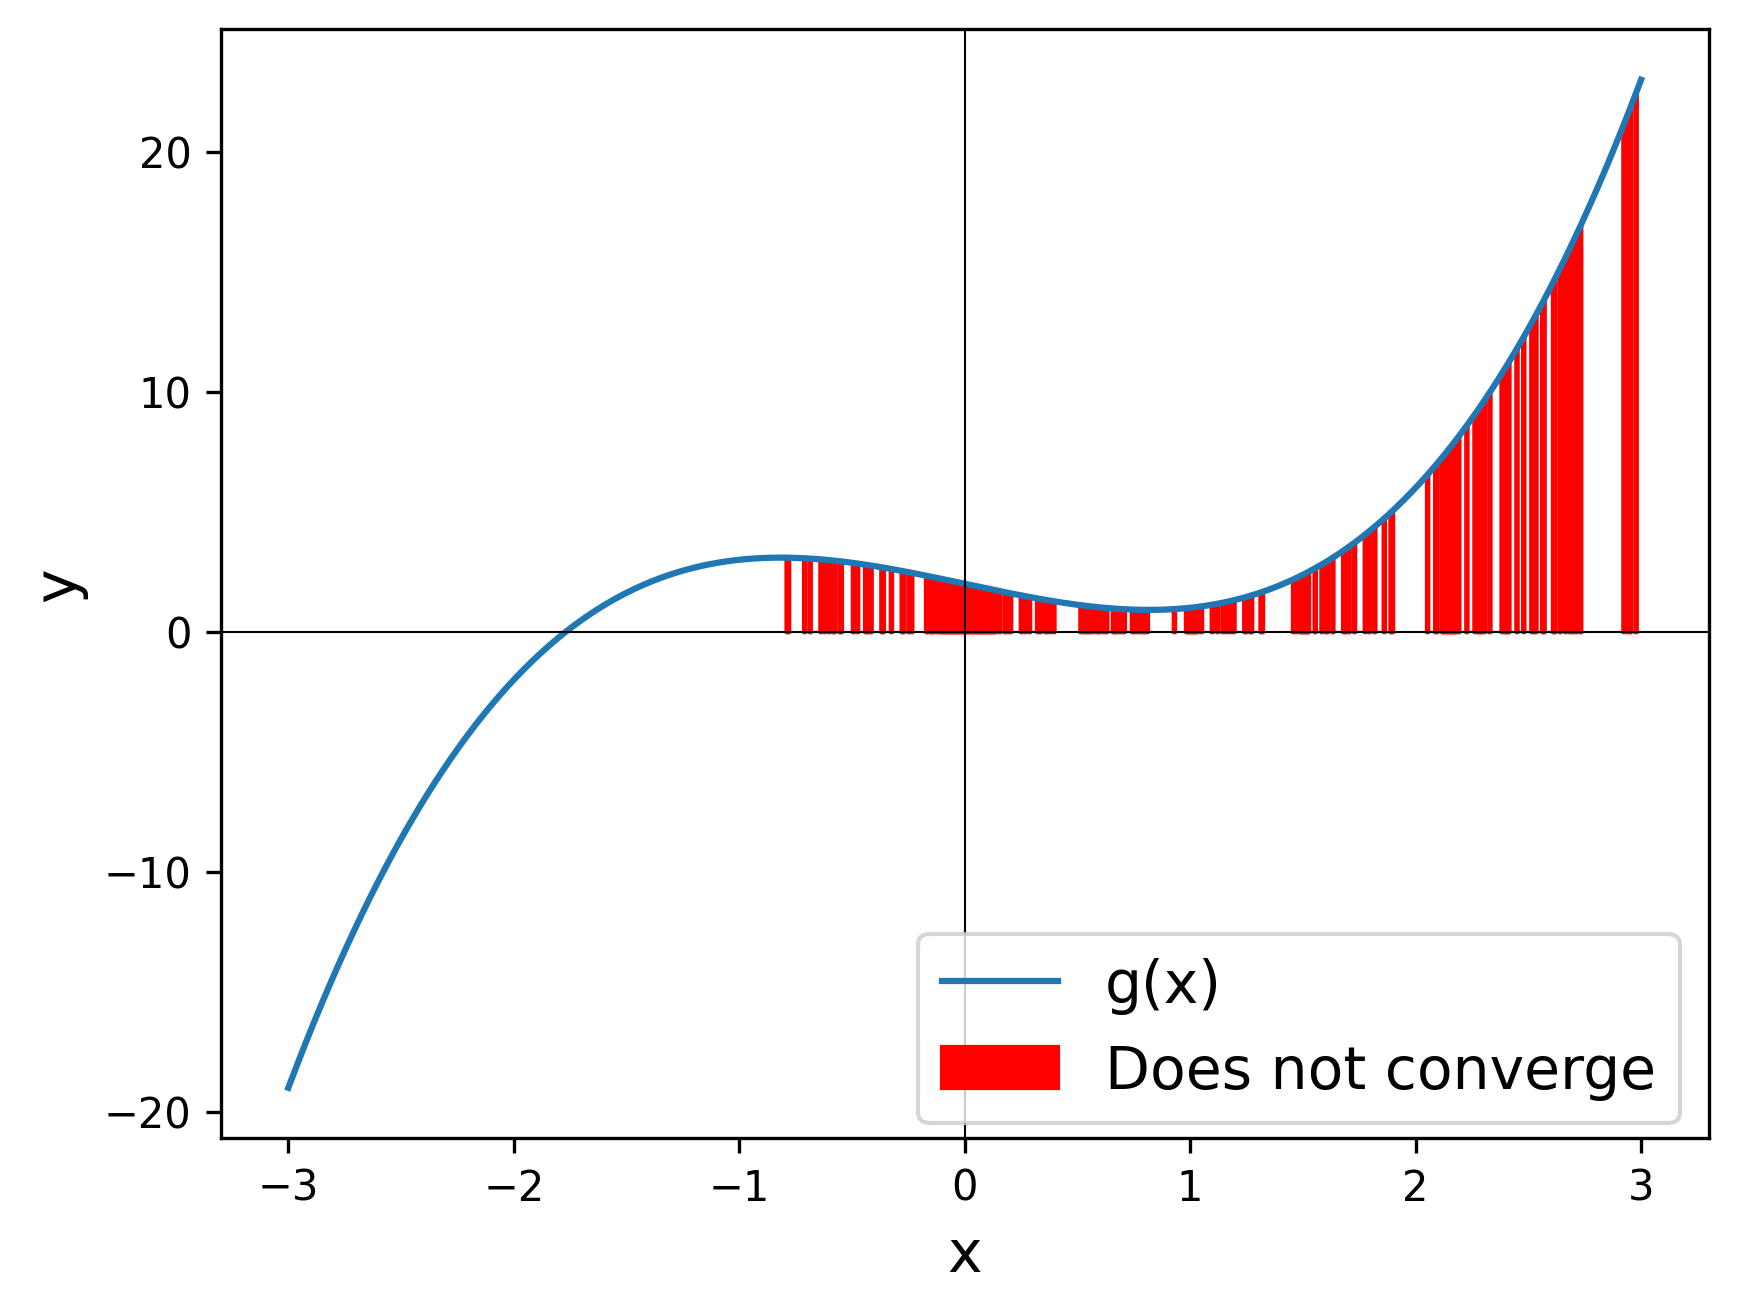

In [6]:
fig, axes = plt.subplots(dpi=300)

axes.plot(x, y, label='g(x)')

labeled = False

for i in range(1, len(results)-1):
    if np.isnan(results[i]):

        fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
        fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

        axes.fill_between(fill_x, fill_y, 0, color='Red', label = 'Does not converge' if not labeled else '')

        labeled = True

axes.axhline(color='Black', lw=0.5)
axes.axvline(color='Black', lw=0.5)

axes.set_xlabel('x', fontsize=14)
axes.set_ylabel('y', fontsize=14)

fig.legend(loc='lower right', bbox_to_anchor=(-0.1, 0.1,1,1), fontsize=14)

plt.savefig('Report/figures/figure1.png')
plt.show()

In [7]:
print(np.round(newton(g, dg, 0.1)[:10], 6))

[0.1      1.014213 0.079656 1.009099 0.052227 1.003965 0.023329 1.000804
 0.004807 1.000035]


#### $ h(x) = x^{1/5} $:

In [8]:
def h(x): return np.power(complex(x), 0.2)
def dh(x): return 0.2*np.power(complex(x), -0.8)

In [9]:
print(np.real(newton(h, dh, 1))[:20])

[ 1.00000000e+00 -4.00000000e+00  1.60000000e+01 -6.40000000e+01
  2.56000000e+02 -1.02400000e+03  4.09600000e+03 -1.63840000e+04
  6.55360000e+04 -2.62144000e+05  1.04857600e+06 -4.19430400e+06
  1.67772160e+07 -6.71088640e+07  2.68435456e+08 -1.07374182e+09
  4.29496730e+09 -1.71798692e+10  6.87194767e+10 -2.74877907e+11]


## Real-valued Functions:

#### $ g(x) = (x - 1)(x + 3) $:

First define $ g(x) $ and $ \frac{dg(x)}{dx} $:

In [10]:
def g(x): return (x - 1)*(x + 3)

def dg(x): return (x - 1) + (x + 3)

Create an array of x values to use as starting points for Newton's Method:

In [11]:
x = np.linspace(-4, 2, 100)
y = g(x)

Find roots starting at each point:

In [12]:
roots  = []
for i in range(100):
    approx = newton(g, dg, x[i])
    roots.append(round(approx[-1], 2))

# copy of roots array with first and last values removed
trimmed = np.empty(98)
trimmed = roots[1:-1]

Plot basins of convergence:

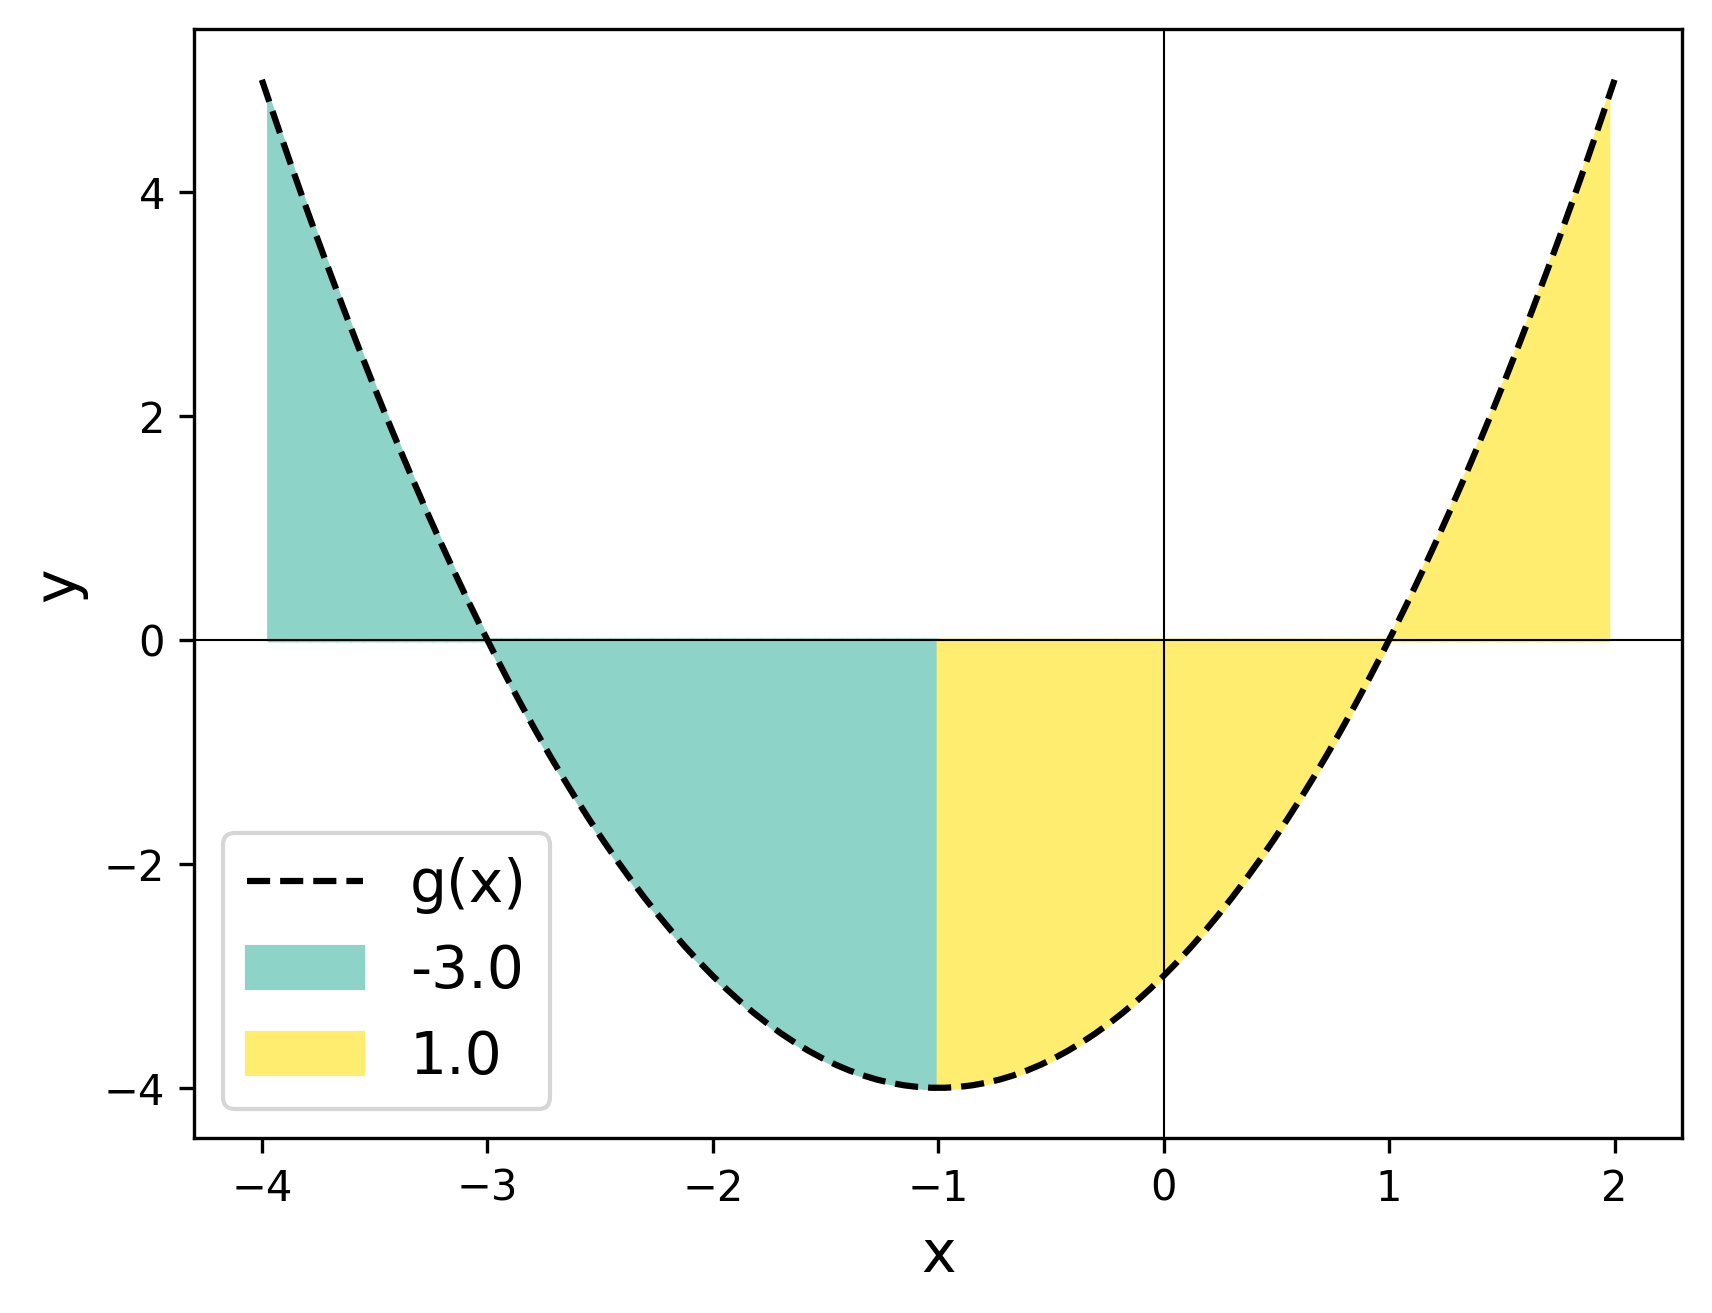

In [13]:
colors = cmap(roots)

# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'k--',label='g(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=0.5)
axes.axhline(color='Black', lw=0.5)

# label axes
axes.set_xlabel('x', fontsize=14)
axes.set_ylabel('y', fontsize=14)

axes.legend(fontsize=14)

# save and display figure
plt.savefig('Report/figures/figure2.png')
plt.show()

#### $ h(x) = (x - 4)(x - 1)(x + 3) $:

First define $ h(x) $ and $ \frac{dh(x)}{dx} $:

In [14]:
def h(x): return (x - 4)*(x - 1)*(x + 3)

def dh(x): return (x - 4)*(x - 1) + (x - 1)*(x + 3) + (x - 4)*(x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [15]:
x = np.linspace(-4, 5, 1000)
y = h(x)

Find roots starting at each point:

In [16]:
roots  = []
for i in range(1000):
    approx = newton(h, dh, x[i])
    roots.append(round(approx[-1], 2))

norm.autoscale(roots)
norm_roots = norm(roots)
colors = cmap(norm_roots)

# copy of roots array with first and last values removed
trimmed = np.empty(998)
trimmed = roots[1:-1]

Plot basins of convergence:

[-3.  1.  4.] [  1 358 293]


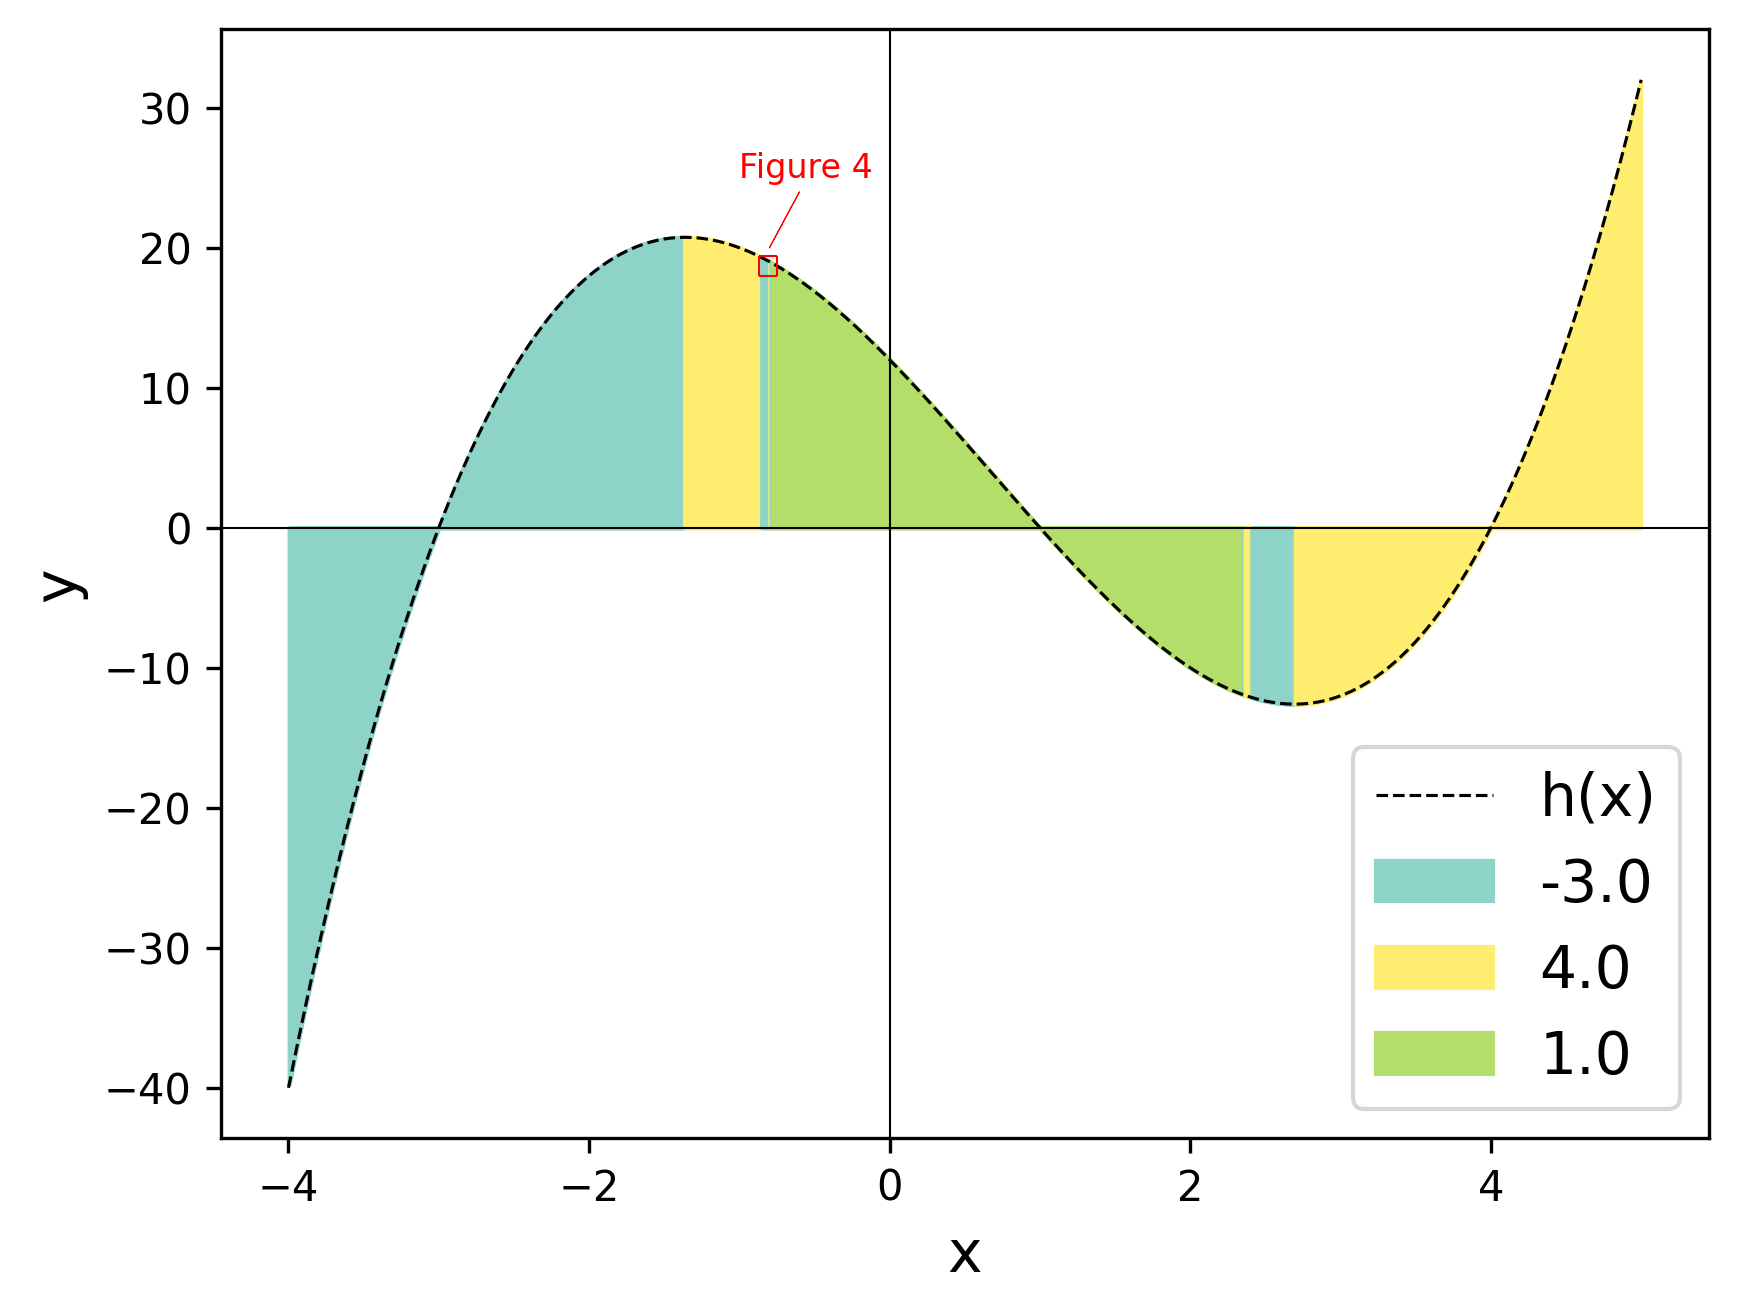

In [17]:
# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1
print(_, root_indices)

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'k--',label='h(x)', lw=0.75)

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=0.5)
axes.axhline(color='Black', lw=0.5)

axes.vlines([-0.87, -0.75], 18, 19.4, color='Red', lw=0.5)
axes.hlines([18, 19.4], -0.87, -0.75, color='Red', lw=0.5)
axes.annotate('Figure 4', (-1, 25), color='Red', fontsize=8)
axes.arrow(-0.6, 24, -0.2, -4, color='Red', lw=0.25)

axes.set_xlabel('x', fontsize=14)
axes.set_ylabel('y', fontsize=14)
axes.legend(fontsize=14)
plt.savefig('Report/figures/figure3.png')
plt.show()

Create a second plot of the basins of convergence, zooming in around $ x = -0.8 $:

In [18]:
x = np.linspace(-0.87, -0.75, 1000)
y = h(x)

Find roots at each point:

In [19]:
cmap=matplotlib.colormaps['Set3']
roots  = []
for i in range(1000):
    approx = newton(h, dh, x[i])
    roots.append(round(approx[-1], 2))

norm.autoscale(roots)
norm_roots = norm(roots)
colors = cmap(norm_roots)

# copy of roots array with first and last values removed
trimmed = np.empty(998)
trimmed = roots[1:-1]

Plot basins:

[-3.  1.  4.] [176 725   1]


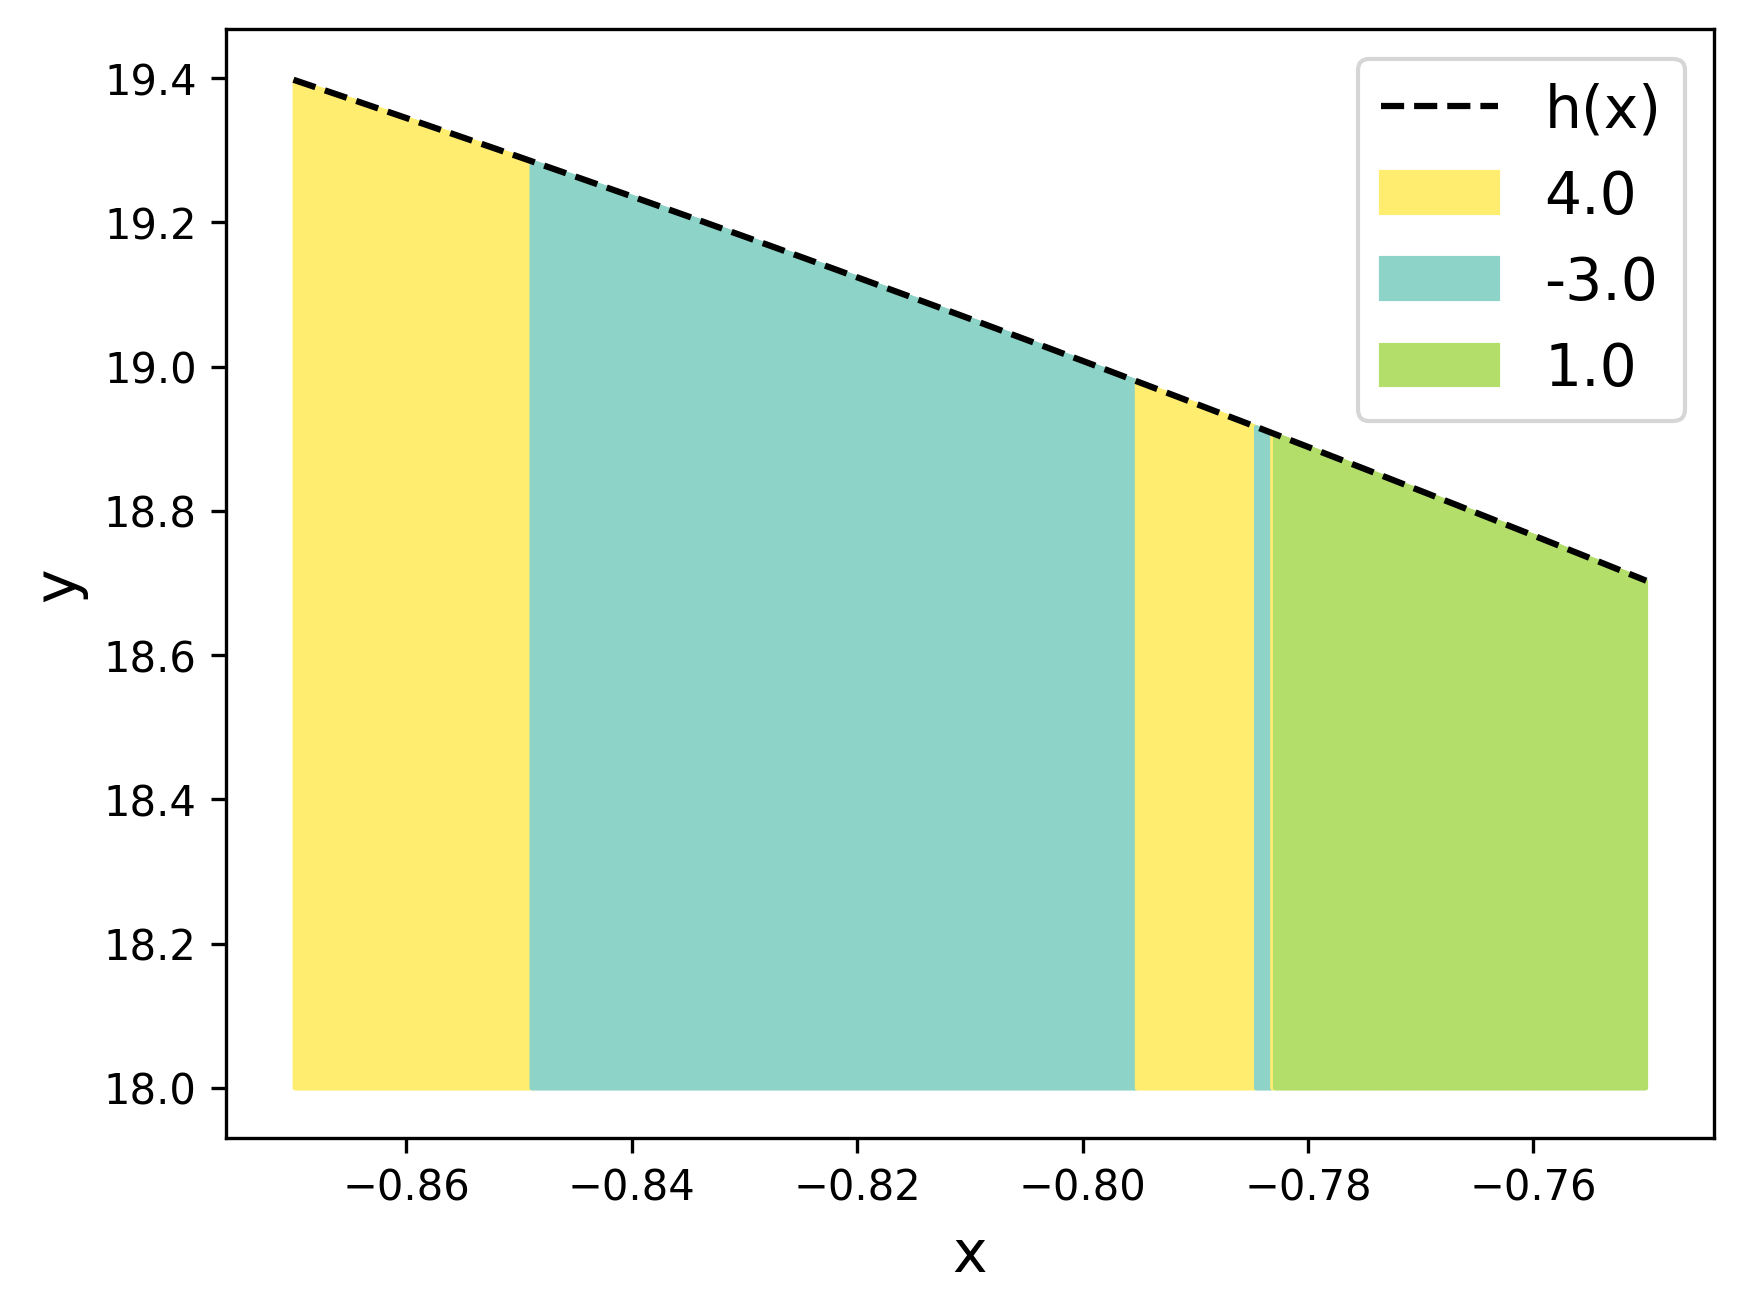

In [20]:
# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1
print(_, root_indices)

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'k--',label='h(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 18, color=colors[i], label=roots[i] if i in root_indices else "")

axes.set_xlabel('x', fontsize=14)
axes.set_ylabel('y', fontsize=14)
axes.legend(fontsize=14)
plt.savefig('Report/figures/figure4.png')
plt.show()

## Complex-valued Functions:

#### $ f(z) = z^3 - 1 $

Define $ f(z) $ and $ \frac{df(z)}{dz} $:

In [21]:
def f(z): return z**3 - 1

def df(z): return 3*z**2

Create a meshgrid (coordinate grid) of points in the complex plane to use as starting points for Newton's Method:

In [22]:
real_axis = np.linspace(-2, 2, 1000)
imag_axis = np.linspace(-2j, 2j, 1000)

a, b = np.meshgrid(real_axis, imag_axis)

Using Newton's Method, find roots starting at each point:

In [23]:
results = np.empty((1000, 1000), dtype=complex)

for i in range(1000):
    for j in range(1000):

        results[999-i][j] = np.round(newton(f=f, df=df, x=a[i][j]+b[i][j])[-1], 2)

roots = np.unique(results)

roots_a_b = np.array([np.real(roots), np.imag(roots)])

norm.autoscale(roots)
norm_roots = norm(roots).astype(float)
norm_results = norm(results).astype(float)

Plot basins of convergence:

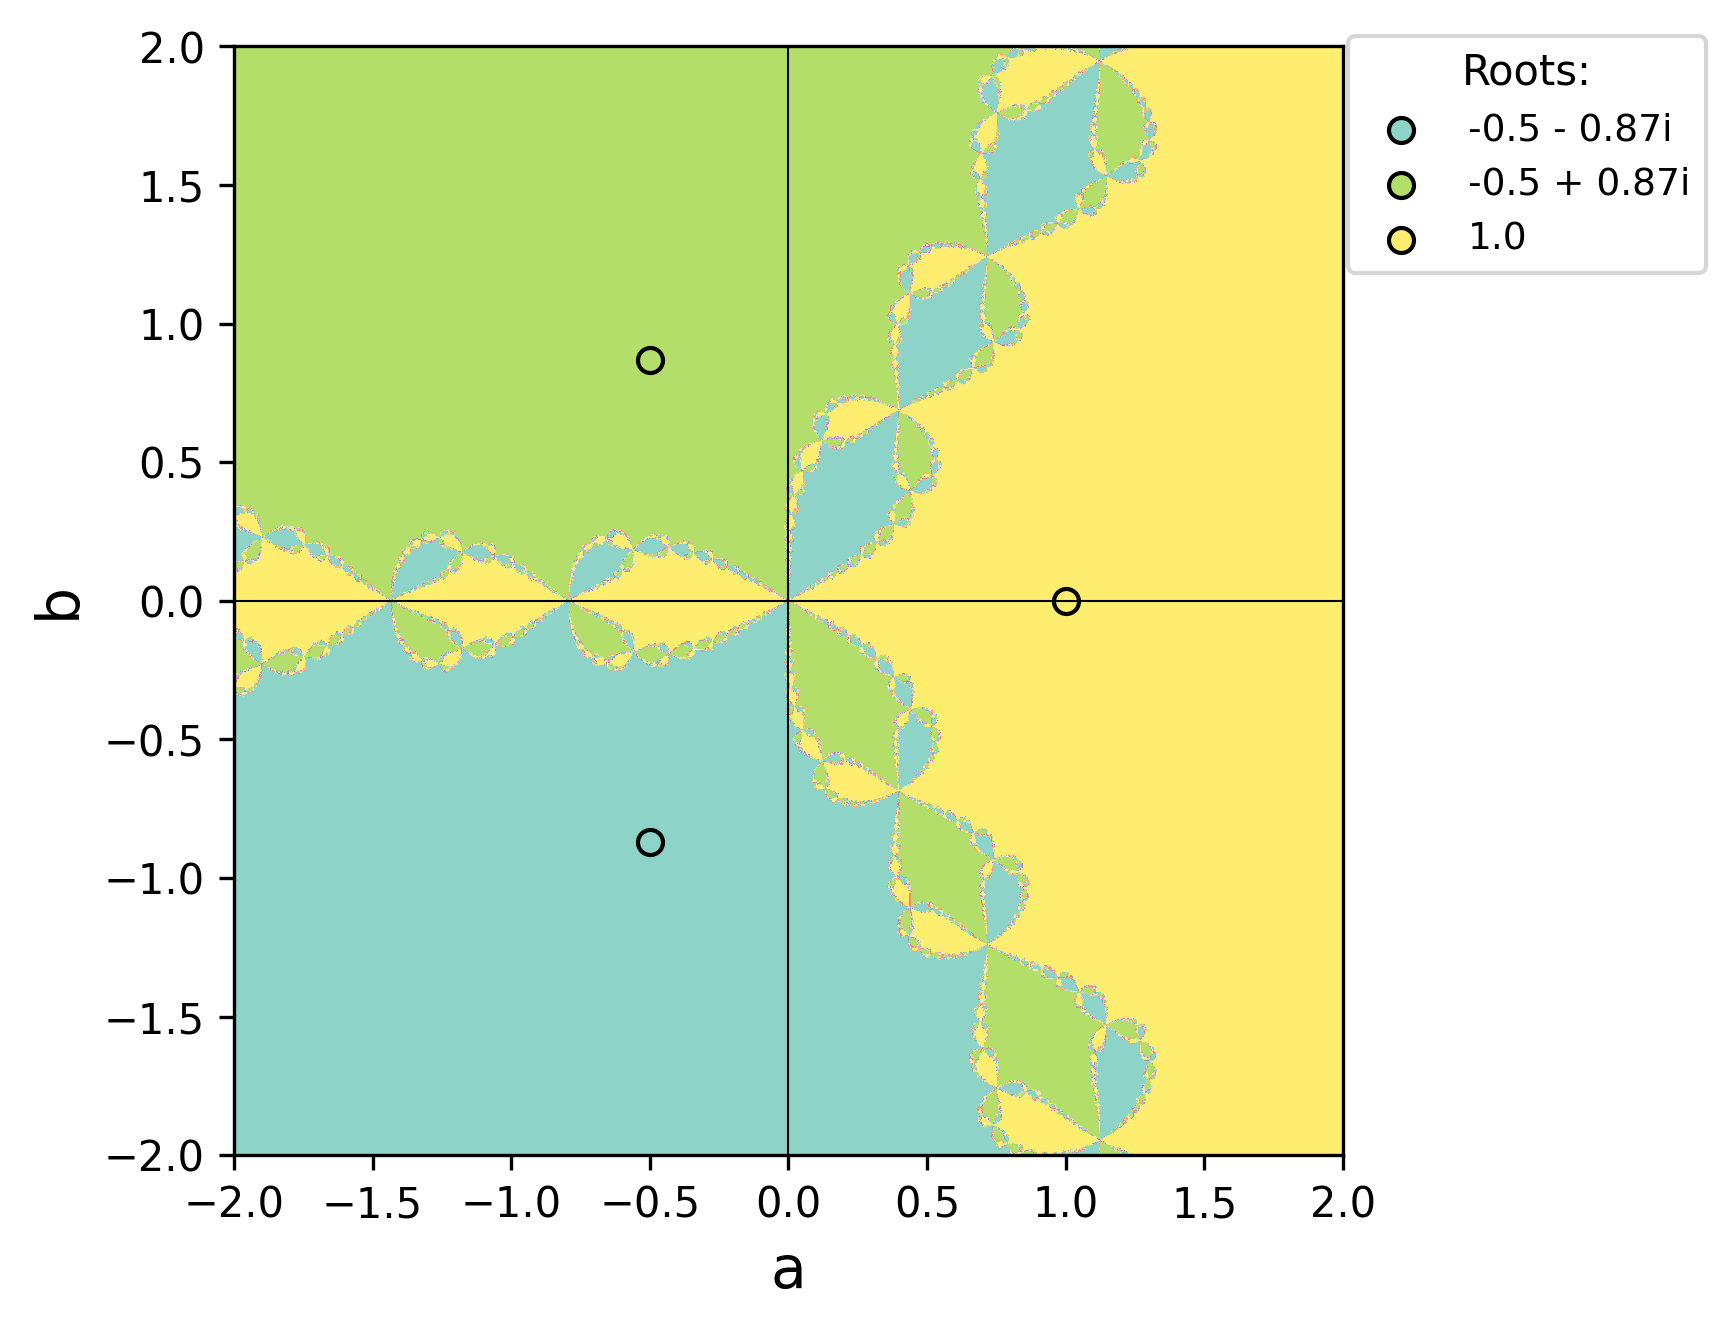

In [24]:
fig, axes = plt.subplots(dpi=300)

axes.imshow(norm_results, cmap='Set3', extent=[-2, 2, -2, 2])

for i in range(len(roots)):

    # create a nicely formatted label for each root
    root_label = (str(roots_a_b[0][i])
                    + ((' - ' if np.sign(roots_a_b[1][i]) < 0 else ' + ') 
                        + (str(np.abs(roots_a_b)[1][i]) + 'i') if np.abs(roots_a_b)[1][i] != 0 else ''))

    axes.scatter(roots_a_b[0][i], roots_a_b[1][i], color=cmap(norm_roots[i]), label=root_label, marker='o', edgecolor='Black')

axes.axhline(color='Black', lw=0.5)
axes.axvline(color='Black', lw=0.5)
axes.set_xlabel('a', fontsize=14)
axes.set_ylabel('b', fontsize=14)

fig.legend(title='Roots:', bbox_to_anchor=(0,-0.1,1,1), fontsize=9)

plt.savefig('Report/figures/figure5.png')
plt.show()

#### $ g(z) = z^5 - z^3 - 2 $:

Define $ g(z) $ and $ \frac{dg(z)}{dz} $:

In [25]:
def g(z): return z**5 - z**3 - 2

def dg(z): return 5*z**4 - 3*z**2

Create a meshgrid (coordinate grid) of points in the complex plane to use as starting points for Newton's Method:

In [26]:
real_axis = np.linspace(-2, 2, 1000)
imag_axis = np.linspace(-2j, 2j, 1000)

a, b = np.meshgrid(real_axis, imag_axis)
print(a.shape)

(1000, 1000)


Using Newton's Method, find roots starting at each point:

In [27]:
results = np.empty((1000, 1000), dtype=complex)

for i in range(1000):
    for j in range(1000):

        results[999-i][j] = np.round(newton(f=g, df=dg, x=a[i][j]+b[i][j])[-1], 2)

# get all roots found by newtons method
roots = np.unique(results)

# split roots into real and imaginary parts
roots_a_b = np.array([np.real(roots), np.imag(roots)])

# scale normalization to the roots
norm.autoscale(roots)

# normalize roots, results and cast to float for cmap()
norm_roots = norm(roots).astype(float)
norm_results = norm(results).astype(float)

Plot roots and their basins of convergence:

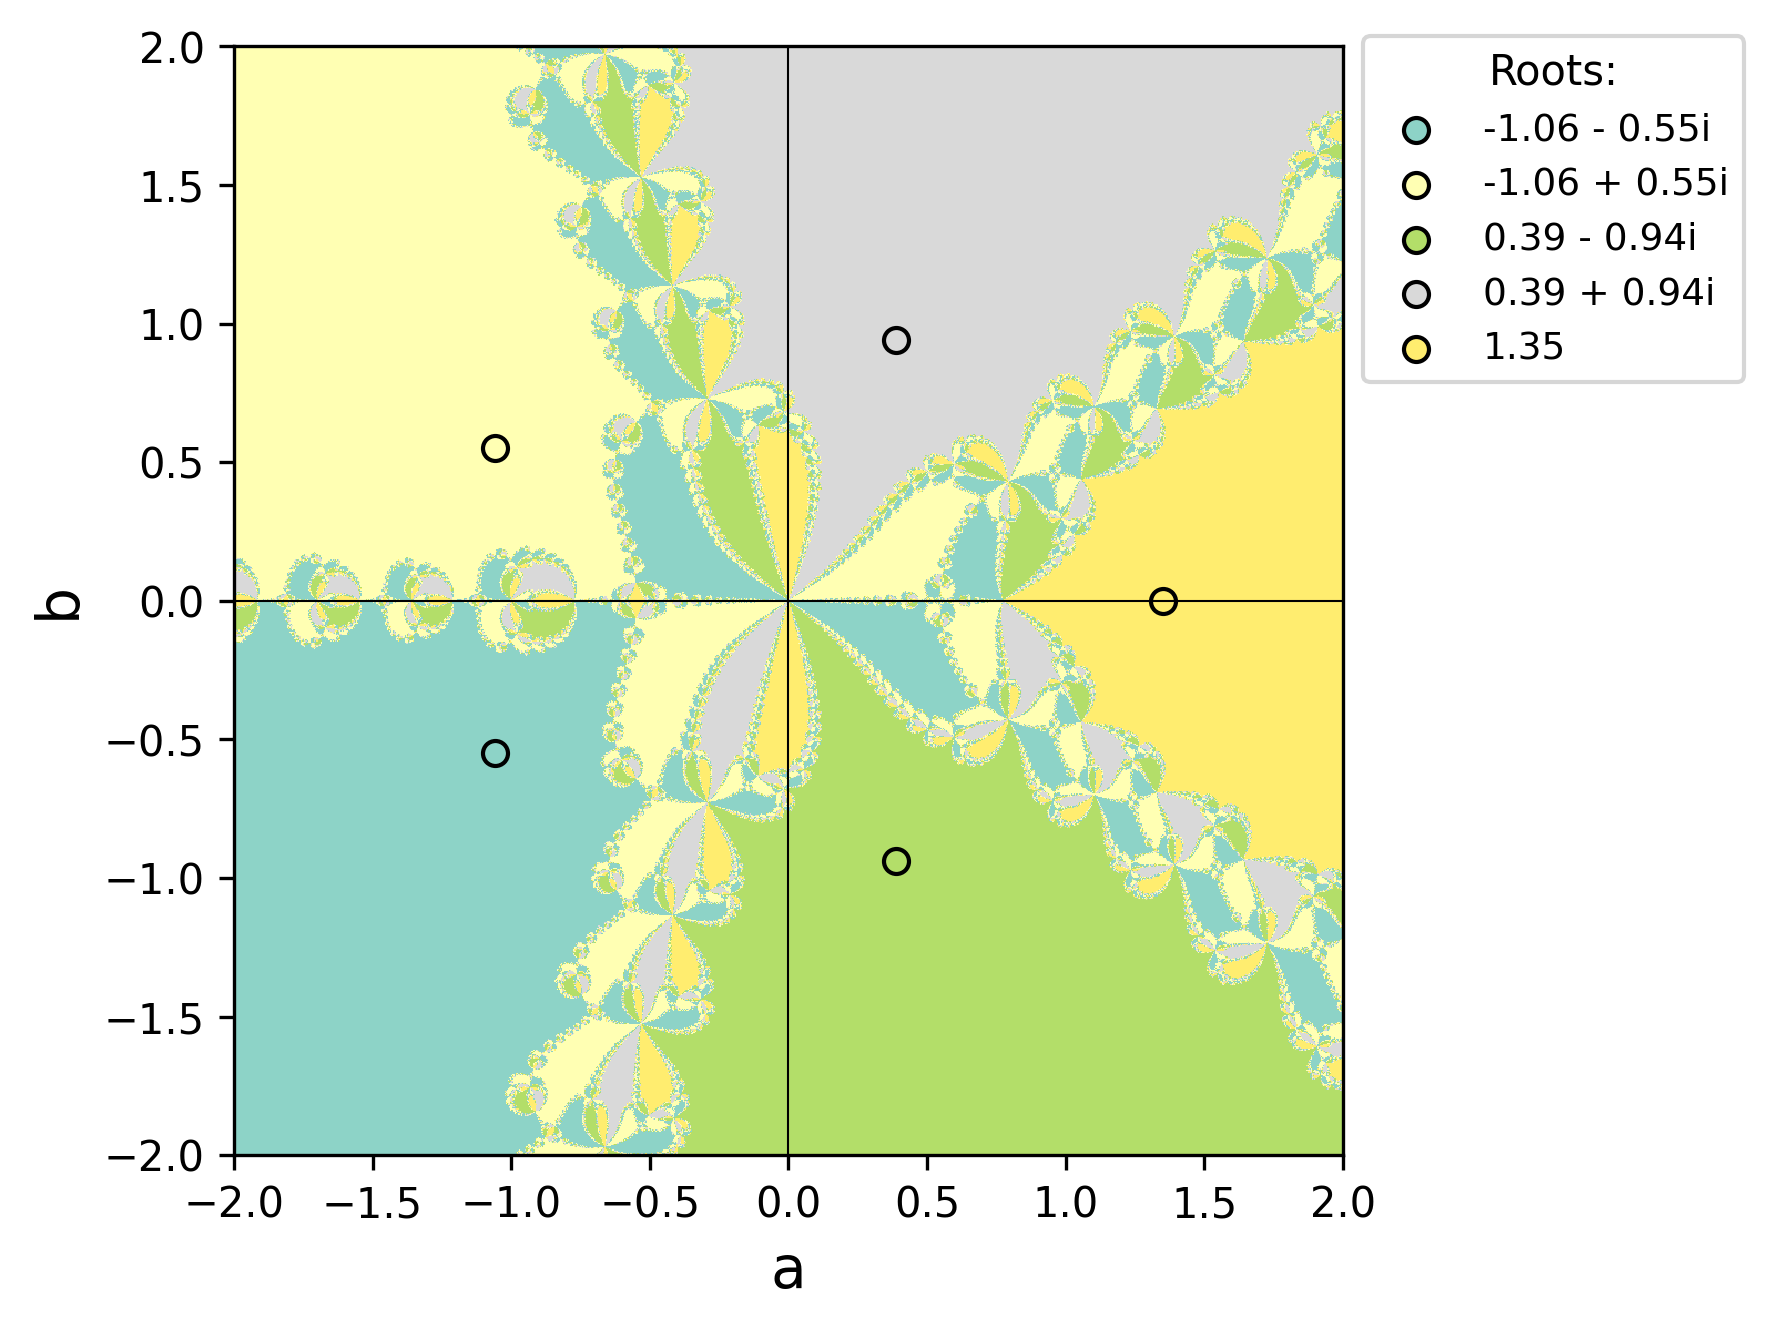

In [28]:
fig, axes = plt.subplots(dpi=300)

# show basins of convergence
axes.imshow(norm_results, cmap='Set3', extent=[-2, 2, -2, 2], interpolation='none')

# for each root
for i in range(len(roots)):

    # create a nicely formatted label
    root_label = (str(roots_a_b[0][i])
                    + ((' - ' if np.sign(roots_a_b[1][i]) < 0 else ' + ') 
                        + (str(np.abs(roots_a_b)[1][i]) + 'i') if np.abs(roots_a_b)[1][i] != 0 else ''))

    # plot the root 
    axes.scatter(roots_a_b[0][i], roots_a_b[1][i], color=cmap(norm_roots[i]), label=root_label, marker='o', edgecolor='Black')

# add x and y axis
axes.axhline(color='Black', lw=0.5)
axes.axvline(color='Black', lw=0.5)

# label axes
axes.set_xlabel('a', fontsize=14)
axes.set_ylabel('b', fontsize=14)

fig.legend(title='Roots:', bbox_to_anchor=(0.02,-0.1,1,1), fontsize=9)

# save and display figure
plt.savefig('Report/figures/figure6.png')
plt.show()

In [29]:
def h(x): return (x - 4)*(x - 1)*(x + 3)

def dh(x): return (x - 4)*(x - 1) + (x - 1)*(x + 3) + (x - 4)*(x + 3)

Create a meshgrid (coordinate grid) of points in the complex plane to use as starting points for Newton's Method:

In [30]:
real_axis = np.linspace(-4, 5, 1000)
imag_axis = np.linspace(-2j, 2j, 1000)

a, b = np.meshgrid(real_axis, imag_axis)
print(a.shape)

(1000, 1000)


Using Newton's Method, find roots starting at each point:

In [31]:
results = np.empty((1000, 1000), dtype=complex)

for i in range(1000):
    for j in range(1000):

        results[999-i][j] = np.round(newton(f=h, df=dh, x=a[i][j]+b[i][j])[-1], 2)

# get all roots found by newtons method
roots = np.unique(results)

# split roots into real and imaginary parts
roots_a_b = np.array([np.real(roots), np.imag(roots)])

# scale normalization to the roots
norm.autoscale(roots)

# normalize roots, results and cast to float for cmap()
norm_roots = norm(roots).astype(float)
norm_results = norm(results).astype(float)

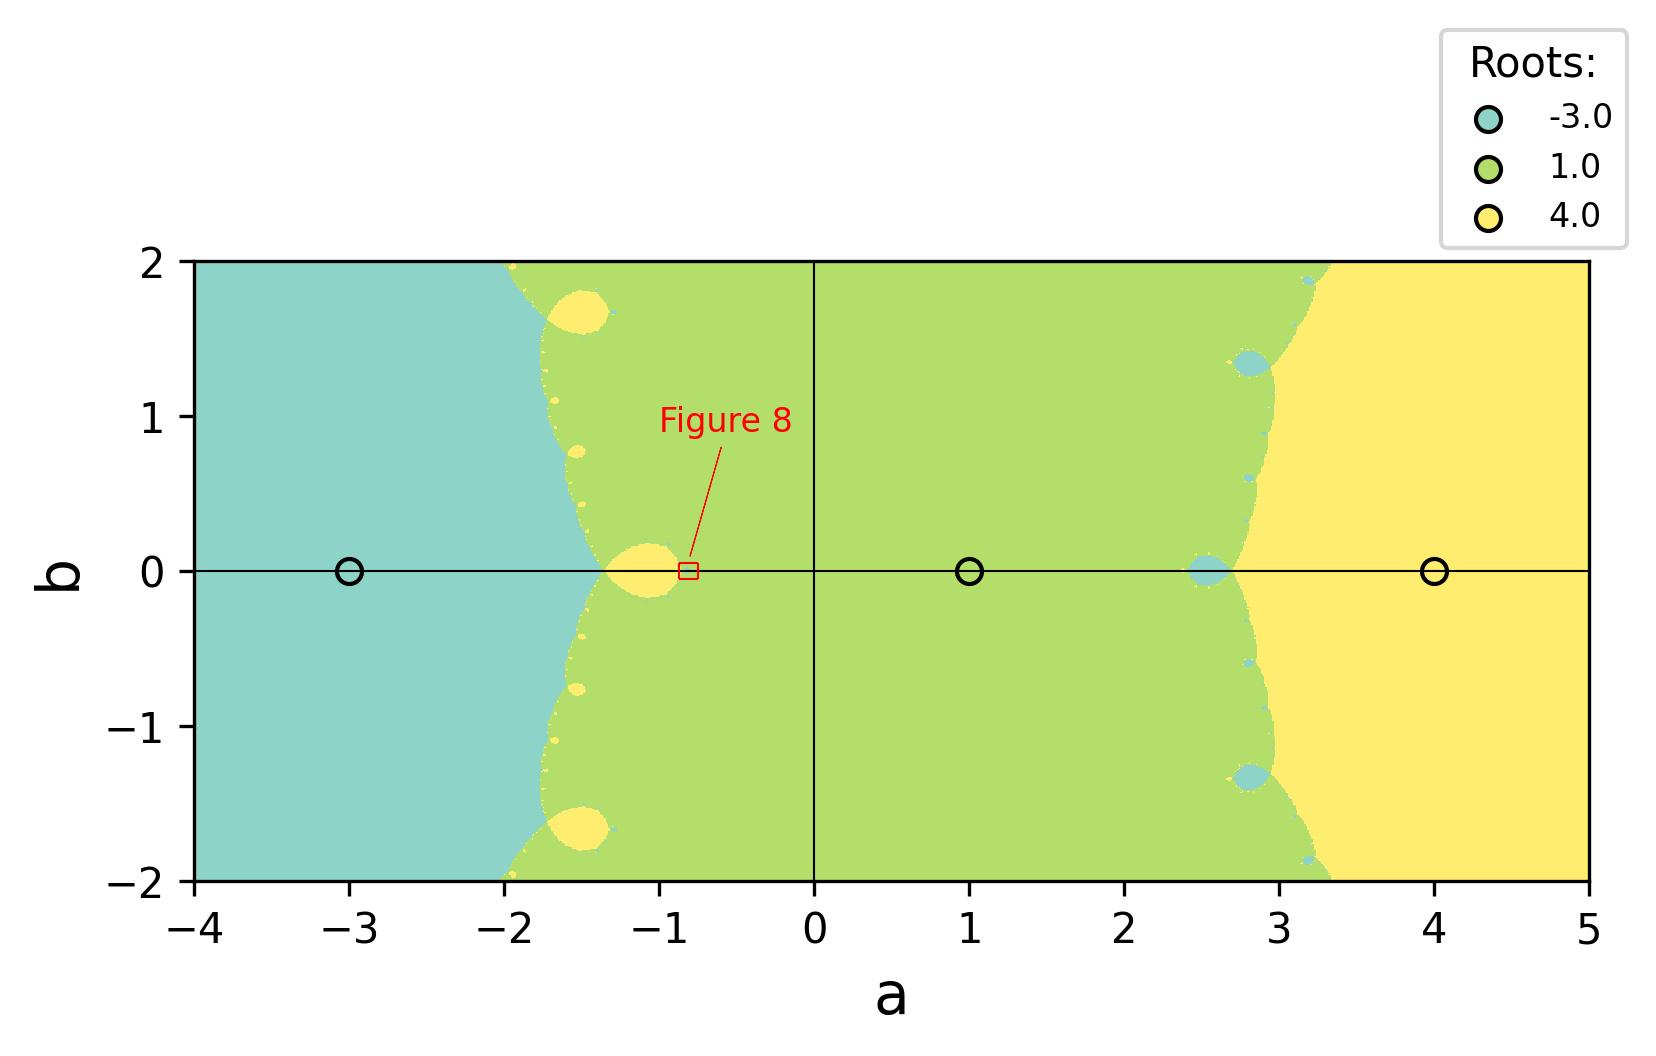

In [32]:
fig, axes = plt.subplots(figsize=(6,4), dpi=300)

# show basins of convergence
axes.imshow(norm_results, cmap='Set3', extent=[-4, 5, -2, 2], interpolation='none')

# for each root
for i in range(len(roots)):

    # create a nicely formatted label
    root_label = (str(roots_a_b[0][i])
                    + ((' - ' if np.sign(roots_a_b[1][i]) < 0 else ' + ') 
                        + (str(np.abs(roots_a_b)[1][i]) + 'i') if np.abs(roots_a_b)[1][i] != 0 else ''))

    # plot the root 
    axes.scatter(roots_a_b[0][i], roots_a_b[1][i], color=cmap(norm_roots[i]), label=root_label, marker='o', edgecolor='Black')

# add x and y axis
axes.axhline(color='Black', lw=0.5)
axes.axvline(color='Black', lw=0.5)

# label axes
axes.set_xlabel('a', fontsize=14)
axes.set_ylabel('b', fontsize=14)

axes.vlines([-0.87, -0.75], -0.05, 0.05, color='Red', lw=0.5)
axes.hlines([-0.05, 0.05], -0.87, -0.75, color='Red', lw=0.5)
axes.annotate('Figure 8', (-1, 0.9), color='Red', fontsize=8)
axes.arrow(-0.6, 0.8, -0.2, -0.7, color='Red', lw=0.25)


fig.legend(title='Roots:', bbox_to_anchor=(-0.07,-0.04,1,1), fontsize=8)

# save and display figure
plt.savefig('Report/figures/figure7.png')
plt.show()

In [33]:
real_axis = np.linspace(-0.87, -0.75, 1000)
imag_axis = np.linspace(-0.05j, 0.05j, 1000)

a, b = np.meshgrid(real_axis, imag_axis)
print(a.shape)

(1000, 1000)


Using Newton's Method, find roots starting at each point:

In [34]:
results = np.empty((1000, 1000), dtype=complex)

for i in range(1000):
    for j in range(1000):

        results[999-i][j] = np.round(newton(f=h, df=dh, x=a[i][j]+b[i][j])[-1], 2)

# get all roots found by newtons method
roots = np.unique(results)

# split roots into real and imaginary parts
roots_a_b = np.array([np.real(roots), np.imag(roots)])

# scale normalization to the roots
norm.autoscale(roots)

# normalize roots, results and cast to float for cmap()
norm_roots = norm(roots).astype(float)
norm_results = norm(results).astype(float)

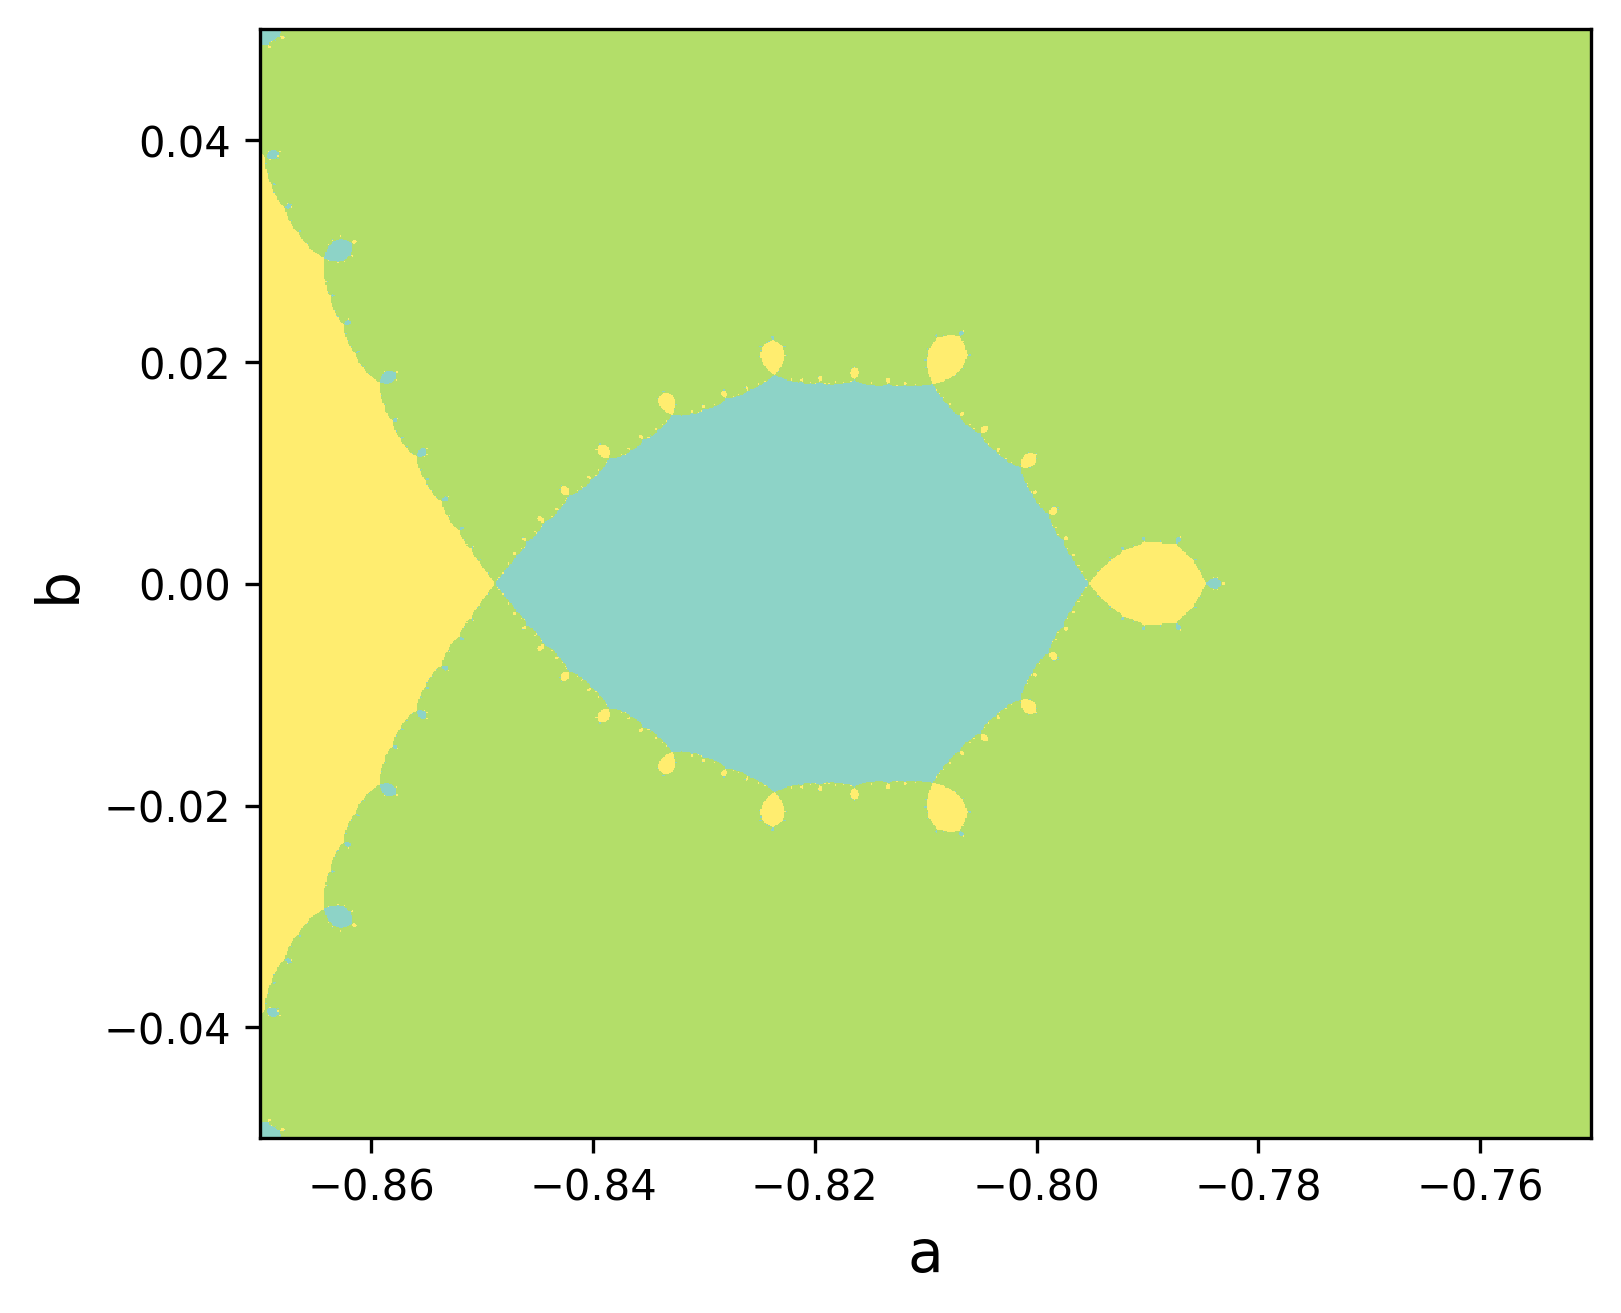

In [35]:
fig, axes = plt.subplots(dpi=300)

# show basins of convergence
axes.imshow(norm_results, cmap='Set3', origin='lower', extent=[-0.87, -0.75, -0.05, 0.05], interpolation='none')

# label axes
axes.set_xlabel('a', fontsize=14)
axes.set_ylabel('b', fontsize=14)

# save and display figure
plt.savefig('Report/figures/figure8.png')
plt.show()